In [1]:
import uuid
import random
import pandas as pd
import numpy as np
from scipy.stats import entropy
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# generate data
def generate_data(n):
    """
    This function will generate n rows of sample data.
    
    params:
        n (Int) : The number of rows you want to generate
        
    returns:
        A pandas dataframe with n rows.
    """
    data = {
        'uuid' : [str(uuid.uuid4()) for _ in range(n)],
        'feature1' : [random.random() for _ in range(n)],
        'feature2' : [random.random() for _ in range(n)],
        'feature3' : [random.random() for _ in range(n)],
        'target' : [sum([random.random(), random.random(), random.random()]) for _ in range(n)]
    }
    return pd.DataFrame(data)

sample_df = generate_data(1000)
sample_df.head()

,uuid,feature1,feature2,feature3,target
0,47be8726-3373-4c5f-90e3-a0c985e8c2fa,0.940277,0.293241,0.887842,1.214733
1,05540521-19a9-463f-9997-d7c4f600ddba,0.755155,0.790025,0.207441,2.643144
2,88167dee-f562-470a-a41b-cc4625c938b7,0.770674,0.532005,0.013269,1.032481
3,1325d84c-6bae-454b-ab0a-fda307741d44,0.594305,0.480034,0.404041,1.685098
4,ed465004-5869-431b-bd3e-0c8b14974703,0.115499,0.111589,0.045613,1.463835


In [3]:
# train model
ft_cols = ['feature1', 'feature2', 'feature3']
X = sample_df[ft_cols].values
Y = sample_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3
)

rfr = RandomForestRegressor().fit(X_train, y_train)

In [4]:
# generate observations
obs_df = generate_data(1500)
obs_df.drop(columns = ['target'], inplace = True)

In [5]:
obs_df['prediction'] = obs_df[ft_cols].apply(lambda x : rfr.predict([x])[0], axis = 1)

In [6]:
obs_df = obs_df.rename(columns = {
    'feature1' : 'obs_feature1',
    'feature2' : 'obs_feature2',
    'feature3' : 'obs_feature3'
})

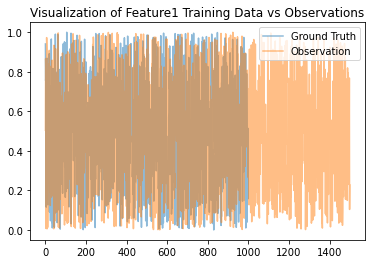

In [7]:
plt.plot(sample_df['feature1'], alpha = 0.5, label = 'Ground Truth')
plt.plot(obs_df['obs_feature1'], alpha = 0.5, label = 'Observation')
plt.legend()
plt.title("Visualization of Feature1 Training Data vs Observations")
plt.show()

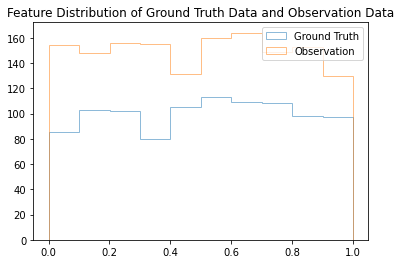

In [8]:
plt.hist(sample_df['feature1'], alpha = 0.5, label = 'Ground Truth', histtype = 'step')
plt.hist(obs_df['obs_feature1'], alpha = 0.5, label = 'Observation', histtype = 'step')
plt.legend()
plt.title("Feature Distribution of Ground Truth Data and Observation Data")
plt.show()